In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.float_format',lambda x: f'{x:,.2f}')
df = pd.read_csv(r'C:\Users\vrssv\Desktop\DA\Challenge\Day 03\train.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


Confirms row count (e.g., 891 passengers) and columns (e.g., Name, Age, Fare).

Identifies numerical vs categorical variables — crucial for choosing plots later.

Helps spot immediate missing values (Age, Cabin, Embarked are known to have nulls).

In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Cabin missing ~77% → not reliable without domain knowledge.

Age missing ~20% → might need imputation using median or group-based median.

Missing Embarked values may require mode imputation.

In [28]:
df.duplicated().sum()

0

No duplicates expected, but checking ensures data integrity before analysis.

In [33]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


Mean age ~29.7 years.

Mean fare ~32 GBP but large std → indicates wide price range.

Fare max outlier ~512 GBP — luxury first-class tickets.

In [43]:
df['Sex'].value_counts(normalize=True)

Sex
male     0.65
female   0.35
Name: proportion, dtype: float64

In [45]:
df['Pclass'].value_counts(normalize=True)

Pclass
3   0.55
1   0.24
2   0.21
Name: proportion, dtype: float64

65% male, 35% female.

Most passengers in 3rd class → majority were lower-income travelers.

<Axes: xlabel='Age', ylabel='Count'>

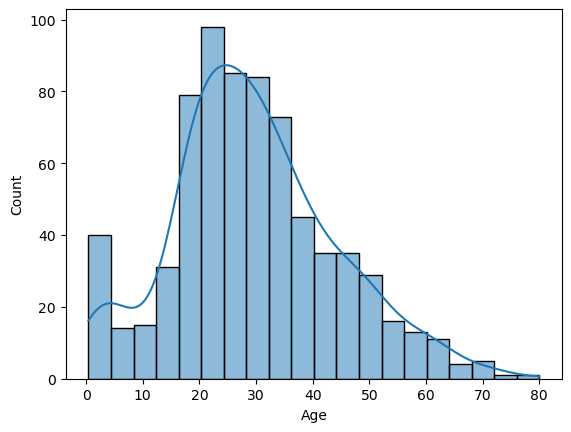

In [49]:
sns.histplot(df['Age'],kde=True)

<Axes: xlabel='Fare', ylabel='Count'>

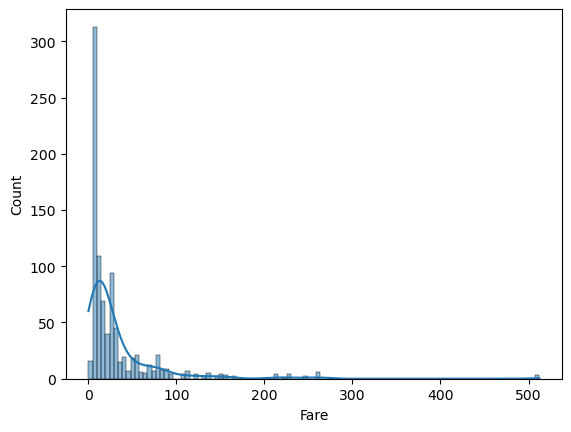

In [51]:
sns.histplot(df['Fare'],kde=True)

Age shows a peak in 20–30 years and a small peak for children.

Fare is right-skewed — most people paid under 50 GBP.

<Axes: xlabel='Fare'>

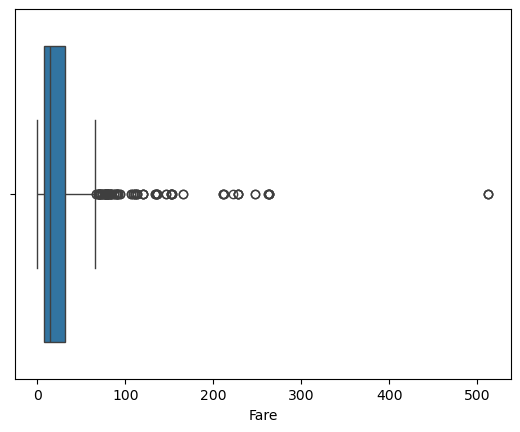

In [54]:
sns.boxplot(x=df['Fare'])

Multiple outliers in Fare → high-paying first-class passengers.

Outliers in Age are less extreme but include very young and very old passengers.

<Axes: xlabel='Sex', ylabel='Survived'>

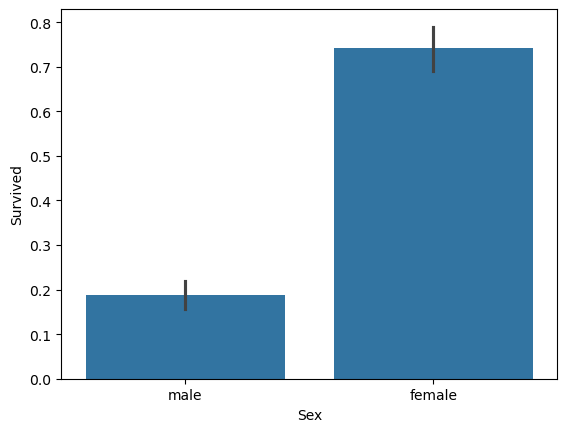

In [57]:
sns.barplot(x='Sex',y='Survived',data=df)

Survival rate for females is much higher (~74%) than males (~19%).

Confirms the “women and children first” evacuation policy.

<Axes: xlabel='Pclass', ylabel='Survived'>

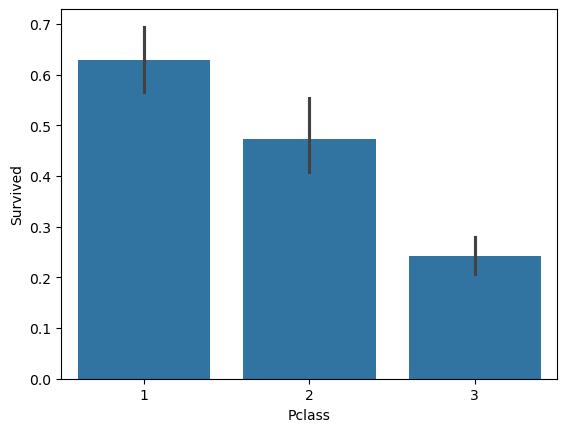

In [60]:
sns.barplot(x='Pclass',y='Survived',data=df)

First-class survival ~63%, third-class ~24%.

Class strongly correlates with survival chances.

C:\Users\vrssv\AppData\Local\Temp\ipykernel_10372\3171758873.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived']==1]['Age'], label='Survived',shade=True)
C:\Users\vrssv\AppData\Local\Temp\ipykernel_10372\3171758873.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived']==0]['Age'], label='Not Survived',shade=True)


<Axes: xlabel='Age', ylabel='Density'>

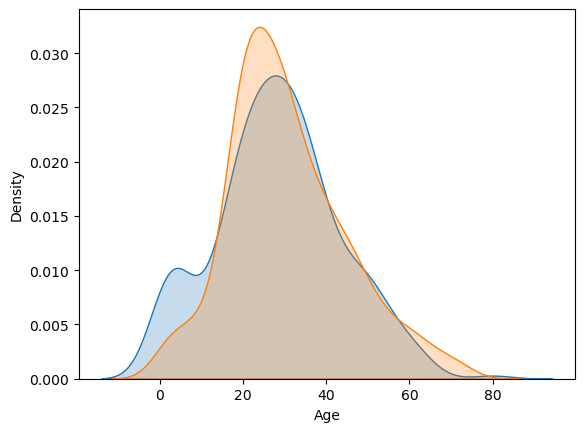

In [72]:
sns.kdeplot(df[df['Survived']==1]['Age'], label='Survived',shade=True)
sns.kdeplot(df[df['Survived']==0]['Age'], label='Not Survived',shade=True)

Children had higher survival rate than adults.

Elderly survival was low regardless of class.

C:\Users\vrssv\AppData\Local\Temp\ipykernel_10372\2783935117.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived']==1]['Fare'], label='Survived', shade=True)
C:\Users\vrssv\AppData\Local\Temp\ipykernel_10372\2783935117.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived']==0]['Fare'], label='Not Survived', shade=True)


<Axes: xlabel='Fare', ylabel='Density'>

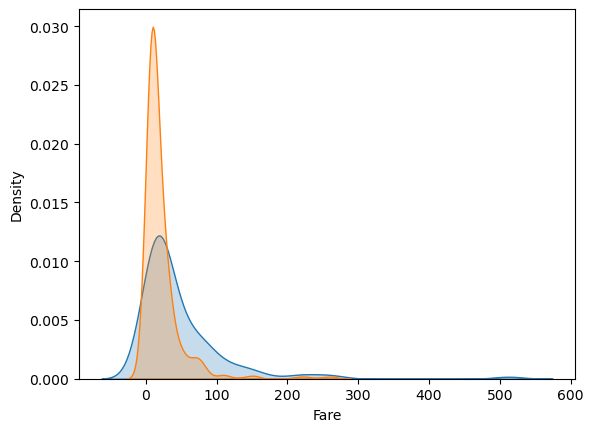

In [77]:
sns.kdeplot(df[df['Survived']==1]['Fare'], label='Survived', shade=True)
sns.kdeplot(df[df['Survived']==0]['Fare'], label='Not Survived', shade=True)

Higher fare passengers had better survival rates — related to cabin location and evacuation priority.

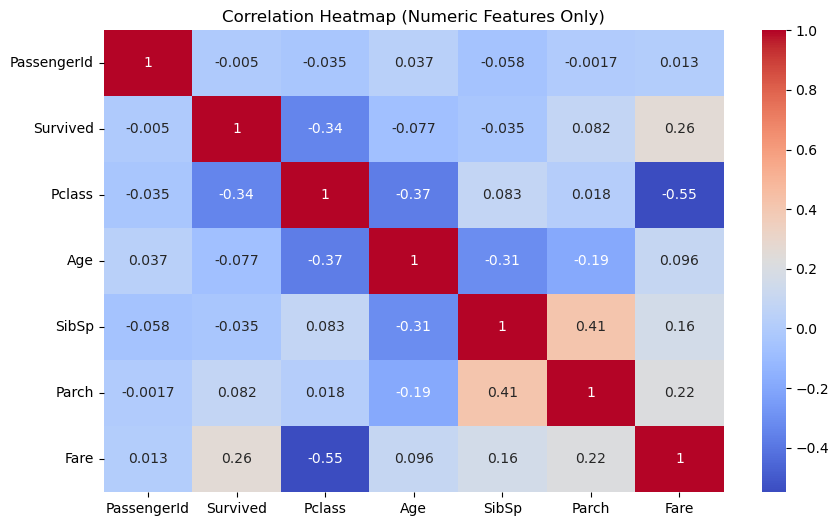

In [84]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # only numeric columns
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

Strong negative correlation between Pclass and Fare.

Age has weak correlation with survival, but Sex and Fare are stronger predictors.

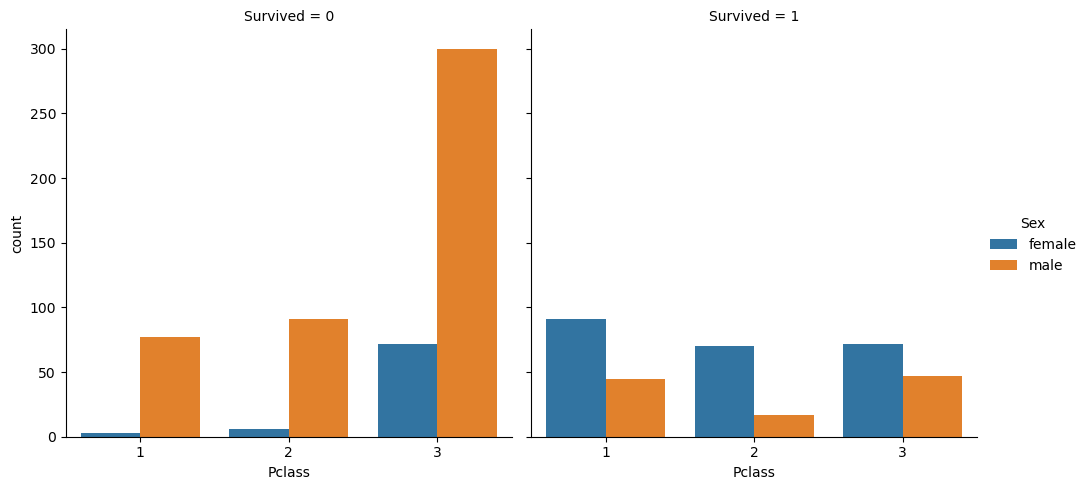

In [87]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=df, kind='count')

First-class women had the highest survival rate (~97%).

Third-class men had the lowest (~13%).

<Axes: xlabel='Embarked', ylabel='Survived'>

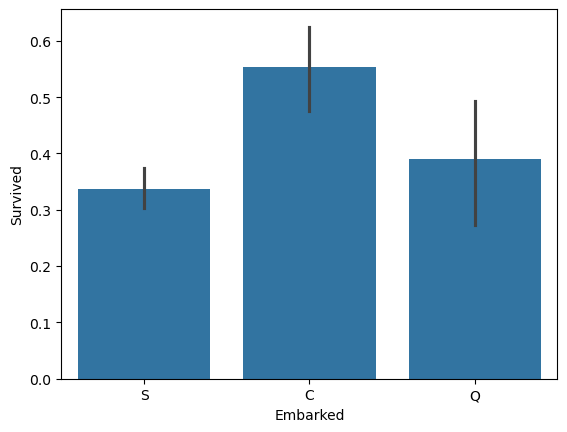

In [90]:
sns.barplot(x='Embarked',y='Survived',data=df)

Passengers from port C had the highest survival *(~55%)*, port S the lowest (~33%).

<Axes: xlabel='Cabin_known', ylabel='Survived'>

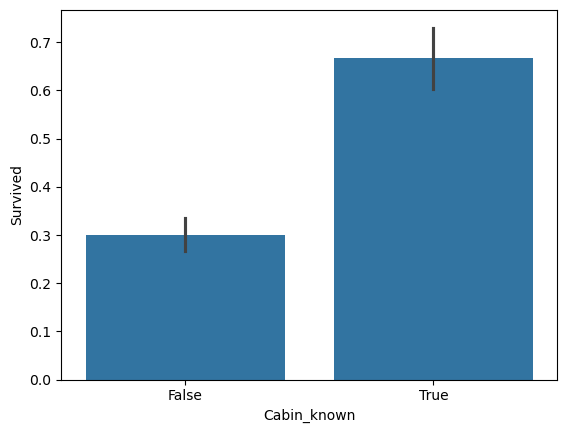

In [96]:
df['Cabin_known']=df['Cabin'].notnull()
sns.barplot(x='Cabin_known', y='Survived', data=df)

Having a known cabin number significantly increases survival probability → closer to lifeboats.

<Axes: xlabel='FamilySize', ylabel='Survived'>

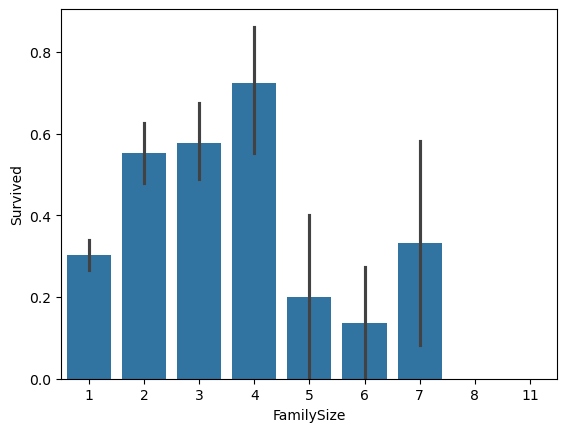

In [99]:
df['FamilySize']=df['SibSp'] + df['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=df)

Medium family sizes (2–4) had higher survival rates. Very large families had low survival.

<Axes: xlabel='Title', ylabel='Survived'>

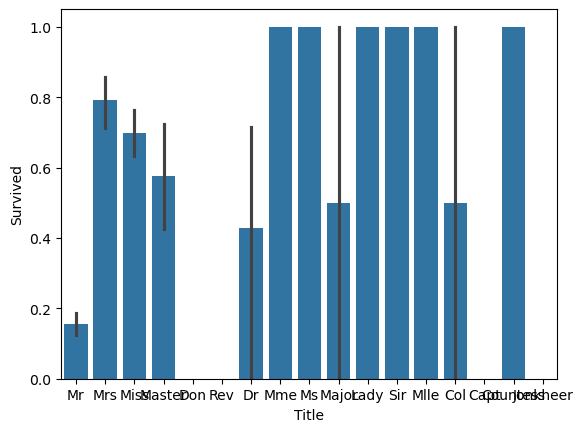

In [106]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.')
sns.barplot(x='Title', y='Survived', data=df)

Titles like Mrs, Miss have high survival, Mr low. Rare titles indicate higher-class passengers.

<Axes: xlabel='Fareperperson', ylabel='Count'>

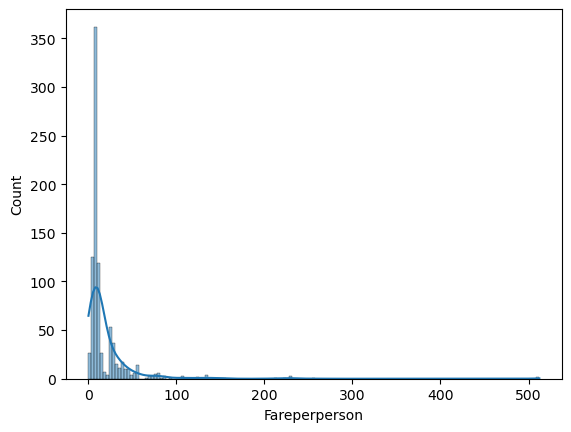

In [109]:
df['Fareperperson']=df['Fare']/df['FamilySize']
sns.histplot(df['Fareperperson'],kde=True)

Helps adjust fare distribution for family group tickets.

In [112]:
pd.crosstab(df['Sex'], df['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.26,0.74
male,0.81,0.19


Females 74% survived, males only 19% survived — confirms earlier finding.

<Axes: xlabel='Sex', ylabel='Pclass'>

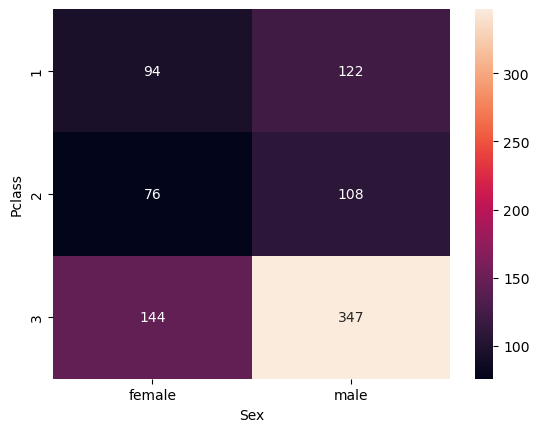

In [117]:
sns.heatmap(
    pd.crosstab(df['Pclass'], df['Sex']),
    annot=True,
    fmt='d'
)

Shows passenger distribution across class and gender before survival comparison.

## Final EDA Summary ##

Key Takeaways:

Gender & Class are the strongest predictors of survival.

Fare indirectly relates to survival — wealthier passengers more likely to survive.

Children had higher survival rates.

Cabin availability indicates higher survival chances due to location advantage.